<a href="https://colab.research.google.com/github/ayushya19/jeremyhowardfastai/blob/master/pokemonclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

!pip install kaggle
!echo homepath

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d lantian773030/pokemonclassification


from zipfile import ZipFile
file_name="pokemonclassification.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done!")

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [0]:
path="/content/PokemonData"

In [0]:
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

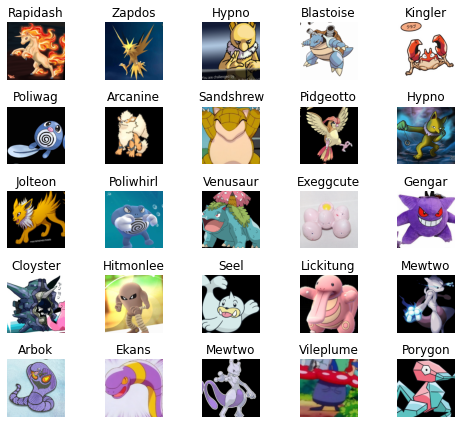

In [0]:
data.show_batch(rows=5,figsize=(7,6))

In [0]:
import os

In [0]:
for filename in os.listdir(path):
  #print(filename)
  for filetodel in os.listdir(path+"/"+filename):
    #print(filetodel)
    if filetodel.endswith("svg"):
      print(filetodel)
      os.remove(path+"/"+filename+"/"+filetodel)
    else: continue

bb5d47bced6e4e33a77faa17e1eec906.svg
1be6e7da1bba4379b298b20013c57b4b.svg
d6fb0a3046364ea2b49525c6f6b966e5.svg
c99b2d19544c4cbbacd7711ade660279.svg
a8734f10941a4deb95fcf7388e4fe8e2.svg
3fe3c6a0bbd14de89092d2c675f743c1.svg
e3ecbb47e192470aa8686734b7813b43.svg
bc08a691e7cb41b0bec2adf931dc9634.svg
45e434d002bd44eeb1acbc2decc8ee0f.svg
2b8bc491c5ca4e788999f8ea53617638.svg
f29b4f9fccff4055b167ece6556143cd.svg
ff270ebfab0f46b3b05c3fecd6a15ef9.svg


In [0]:
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.379952,1.578964,0.361437,01:52
1,1.797639,0.678972,0.181818,01:53


Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old beha

In [0]:
for filename in os.listdir(path):
  print(filename)#if filename.endswith(".jpg"):
    #print(filename)
  #else: continue